<a href="https://colab.research.google.com/github/nagabathula/C255-DataMIning/blob/main/Assignment_4_Colab_for_Normalization_%2C_binning_scaling_Impute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# **Nomalization and Scaling**

In [ ]:
wine = pd.read_csv('/content/winequality-red.csv',usecols=['fixed acidity','citric acid','total sulfur dioxide','alcohol'], sep=';')
wine.head()

,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,7.4,0.00,34.0,9.4
1,7.8,0.00,67.0,9.8
2,7.8,0.04,54.0,9.8
3,11.2,0.56,60.0,9.8
4,7.4,0.00,34.0,9.4


In [ ]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(wine)
minmax = pd.DataFrame(minmax, columns =['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(wine)
standard = pd.DataFrame(standard, columns =['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(wine)
robust = pd.DataFrame(robust, columns =['fixed acidity','citric acid','total sulfur dioxide','alcohol'])

In [ ]:
print('\033[1m'+'Without scaling:'+'\033[0m')
display(wine.head())
print('*' * 45)
print('\033[1m'+'With minmax scaling:'+'\033[0m')
display(minmax.head())
print('*' * 45)
print('\033[1m'+'With standard scaling:'+'\033[0m')
display(standard.head())
print('*' * 45 )
print('\033[1m'+'With robust scaling:'+'\033[0m')
display(robust.head())

Without scaling:


,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,7.4,0.00,34.0,9.4
1,7.8,0.00,67.0,9.8
2,7.8,0.04,54.0,9.8
3,11.2,0.56,60.0,9.8
4,7.4,0.00,34.0,9.4


*********************************************
With minmax scaling:


,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,0.247788,0.00,0.098940,0.153846
1,0.283186,0.00,0.215548,0.215385
2,0.283186,0.04,0.169611,0.215385
3,0.584071,0.56,0.190813,0.215385
4,0.247788,0.00,0.098940,0.153846


*********************************************
With standard scaling:


,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,-0.528360,-1.391472,-0.379133,-0.960246
1,-0.298547,-1.391472,0.624363,-0.584777
2,-0.298547,-1.186070,0.229047,-0.584777
3,1.654856,1.484154,0.411500,-0.584777
4,-0.528360,-1.391472,-0.379133,-0.960246


*********************************************
With robust scaling:


,fixed acidity,citric acid,total sulfur dioxide,alcohol
0,-0.238095,-0.787879,-0.100,-0.50
1,-0.047619,-0.787879,0.725,-0.25
2,-0.047619,-0.666667,0.400,-0.25
3,1.571429,0.909091,0.550,-0.25
4,-0.238095,-0.787879,-0.100,-0.50


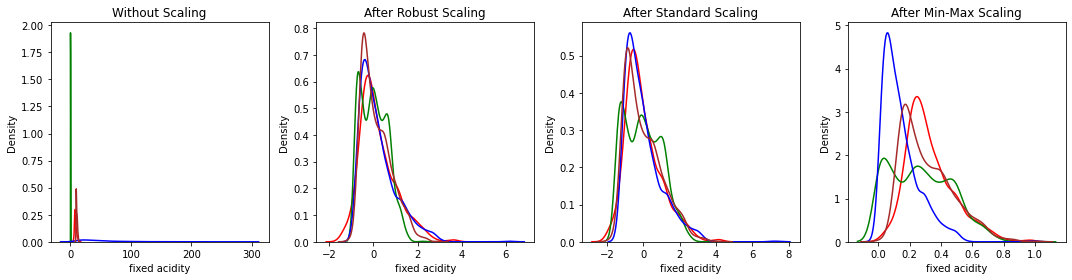

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
sns.kdeplot(wine['fixed acidity'], color ='red')
sns.kdeplot(wine['citric acid'],  color ='green')
sns.kdeplot(wine['total sulfur dioxide'],  color ='blue')
sns.kdeplot(wine['alcohol'],  color ='brown')
plt.title('Without Scaling')

plt.subplot(1,4,4) 
sns.kdeplot(minmax['fixed acidity'],  color ='red')
sns.kdeplot(minmax['citric acid'],  color ='green')
sns.kdeplot(minmax['total sulfur dioxide'],  color ='blue')
sns.kdeplot(minmax['alcohol'],  color ='brown')
plt.title('After Min-Max Scaling')

plt.subplot(1,4,3)
sns.kdeplot(standard['fixed acidity'], color ='red')
sns.kdeplot(standard['citric acid'],  color ='green')
sns.kdeplot(standard['total sulfur dioxide'],  color ='blue')
sns.kdeplot(standard['alcohol'],  color ='brown')
plt.title('After Standard Scaling')

plt.subplot(1,4,2)
sns.kdeplot(robust['fixed acidity'],  color ='red')
sns.kdeplot(robust['citric acid'],  color ='green')
sns.kdeplot(robust['total sulfur dioxide'],  color ='blue')
sns.kdeplot(robust['alcohol'],  color ='brown')
plt.title('After Robust Scaling')


plt.tight_layout()
plt.show()

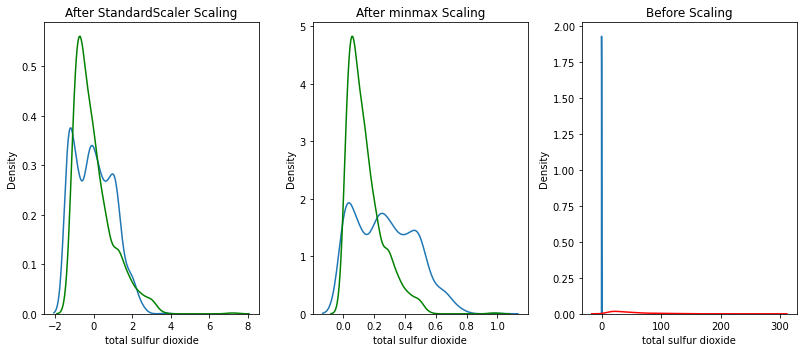

In [ ]:
##Distplot before and after StandardScaler Standardization between citric acid and total sulfur dioxide
plt.figure(figsize=(15,5))

plt.subplot(1,4,3)
sns.distplot(wine['citric acid'],hist = False)
sns.distplot(wine['total sulfur dioxide'],hist = False,color='red')
plt.title('Before Scaling')

plt.subplot(1,4,1)
sns.distplot(standard['citric acid'],hist = False)
sns.distplot(standard['total sulfur dioxide'],hist = False,color='green')
plt.title('After StandardScaler Scaling')

plt.subplot(1,4,2)
sns.distplot(minmax['citric acid'],hist = False)
sns.distplot(minmax['total sulfur dioxide'],hist = False,color='green')
plt.title('After minmax Scaling')

plt.tight_layout()
plt.show()

# **Binning and Scaling**

In [12]:
import pandas as pd


data = pd.read_csv('/content/train.csv')


print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


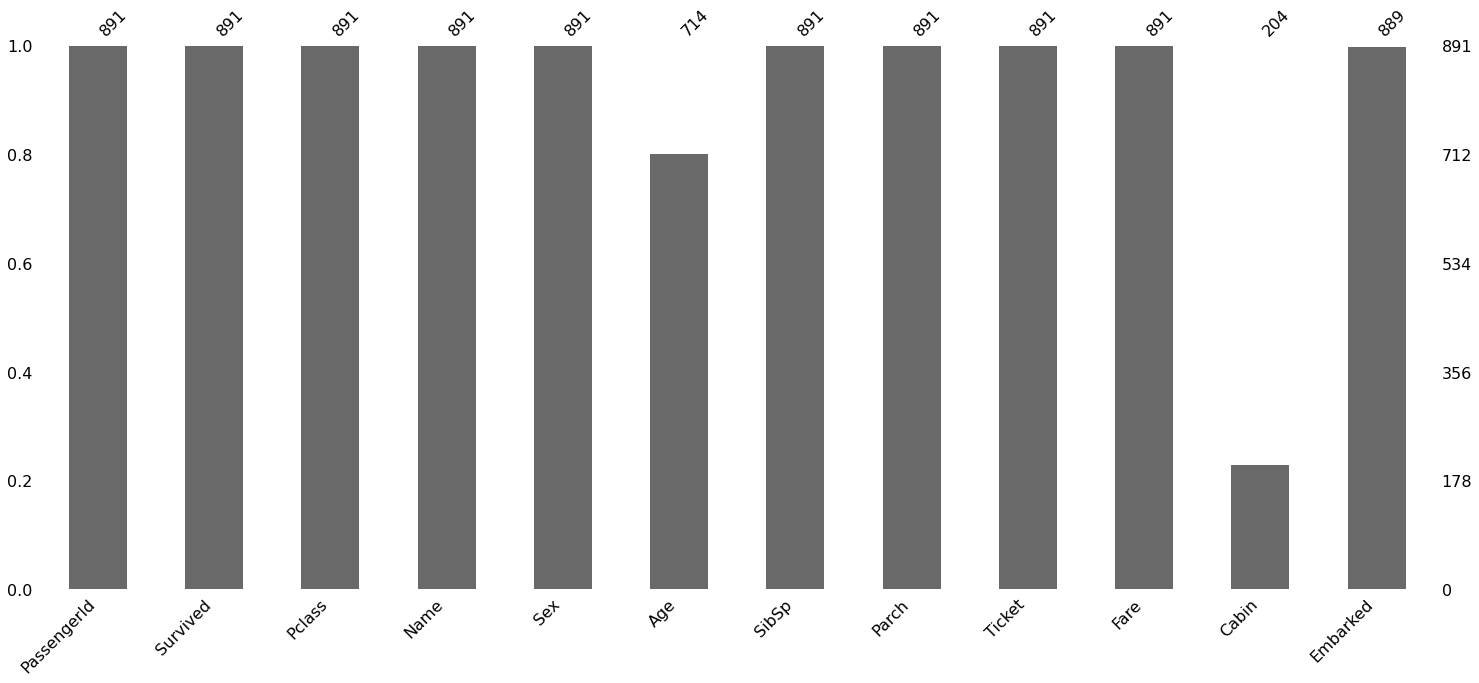

In [13]:
import missingno

missingno.bar(data)

In [14]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [15]:
# Binning for Age
px.histogram(data.Age, title="Frequency dist. Age")

In [16]:
data["age_binned"] = pd.cut(data['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [17]:
fig = go.Figure()

survived = data[data.Survived == 1]
not_survived = data[data.Survived == 0]

fig.add_trace(
    go.Histogram(x=survived.age_binned, name="survived")
)
fig.add_trace(
    go.Histogram(x=not_survived.age_binned, name="not survived")
)

fig.update_layout(
    title="Survived vs Non-Survived by Age"
)

In [18]:
##Fare Binning
data["fare_binned"] = pd.cut(data['Fare'], bins=[-1,40,100,300, 550], labels=['Poor','Mediocre','Rich','Very Rich'])

In [19]:
data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_binned,fare_binned
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Poor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mediocre
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Poor
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mediocre
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult,Poor
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Teenage,Poor
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Poor
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult,Poor


In [20]:
data['family'] = data.SibSp + data.Parch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_binned,fare_binned,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Poor,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mediocre,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Poor,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mediocre,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Poor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Adult,Poor,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Teenage,Poor,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Poor,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Adult,Poor,0


In [22]:
# One hot encoding

from sklearn import preprocessing
prepared_data = data.copy()
labels = ['age_binned', 'fare_binned', 'Embarked', 'Pclass']

enc_hot = preprocessing.OneHotEncoder()
fitted_values = enc_hot.fit_transform(prepared_data[labels]).toarray()

cats = []

for category in enc_hot.categories_:
    for c in category:
        cats.append(c)

prepared_data[cats] = fitted_values

prepared_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Mediocre,Poor,Rich,Very Rich,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
prepared_data = prepared_data.drop(['Age', 'Fare', 'Pclass', 'Embarked', 'age_binned', 'fare_binned', 'Name', 'Ticket', 'Fare', 'PassengerId', 'Cabin'], axis=1)

In [24]:
# Label Encoding
le = preprocessing.LabelEncoder()
transformed = le.fit_transform(prepared_data.Sex)
prepared_data.Sex = transformed

In [30]:
prepared_data

,Survived,Sex,SibSp,Parch,family,Adult,Children,Elder,Teenage,NaN,Mediocre,Poor,Rich,Very Rich,C,Q,S,1,2,3
0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
888,0,0,1,2,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:


prepared_data = prepared_data[prepared_data.columns.dropna()]


In [36]:
prepared_data

,Survived,Sex,SibSp,Parch,family,Adult,Children,Elder,Teenage,Mediocre,Poor,Rich,Very Rich,C,Q,S,1,2,3
0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
888,0,0,1,2,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [37]:
prepared_data.columns = [ 'Survived',       'Sex',     'SibSp',     'Parch', 'family', 'Adult',  'Children', 'Elder',   'Teenage',
           'Mediocre',      'Poor',      'Rich', 'Very Rich',
                 'PortS',        'PortC',         'PortQ',
               'Class1',           'Class2',           'Class3' ]

In [38]:
prepared_data

,Survived,Sex,SibSp,Parch,family,Adult,Children,Elder,Teenage,Mediocre,Poor,Rich,Very Rich,PortS,PortC,PortQ,Class1,Class2,Class3
0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
887,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
888,0,0,1,2,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# **MICE Imputation on Kidney Disease Data**

In [40]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 864 kB/s 


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
import xgboost

In [43]:
housing_df = pd.read_csv('/content/housing.csv')

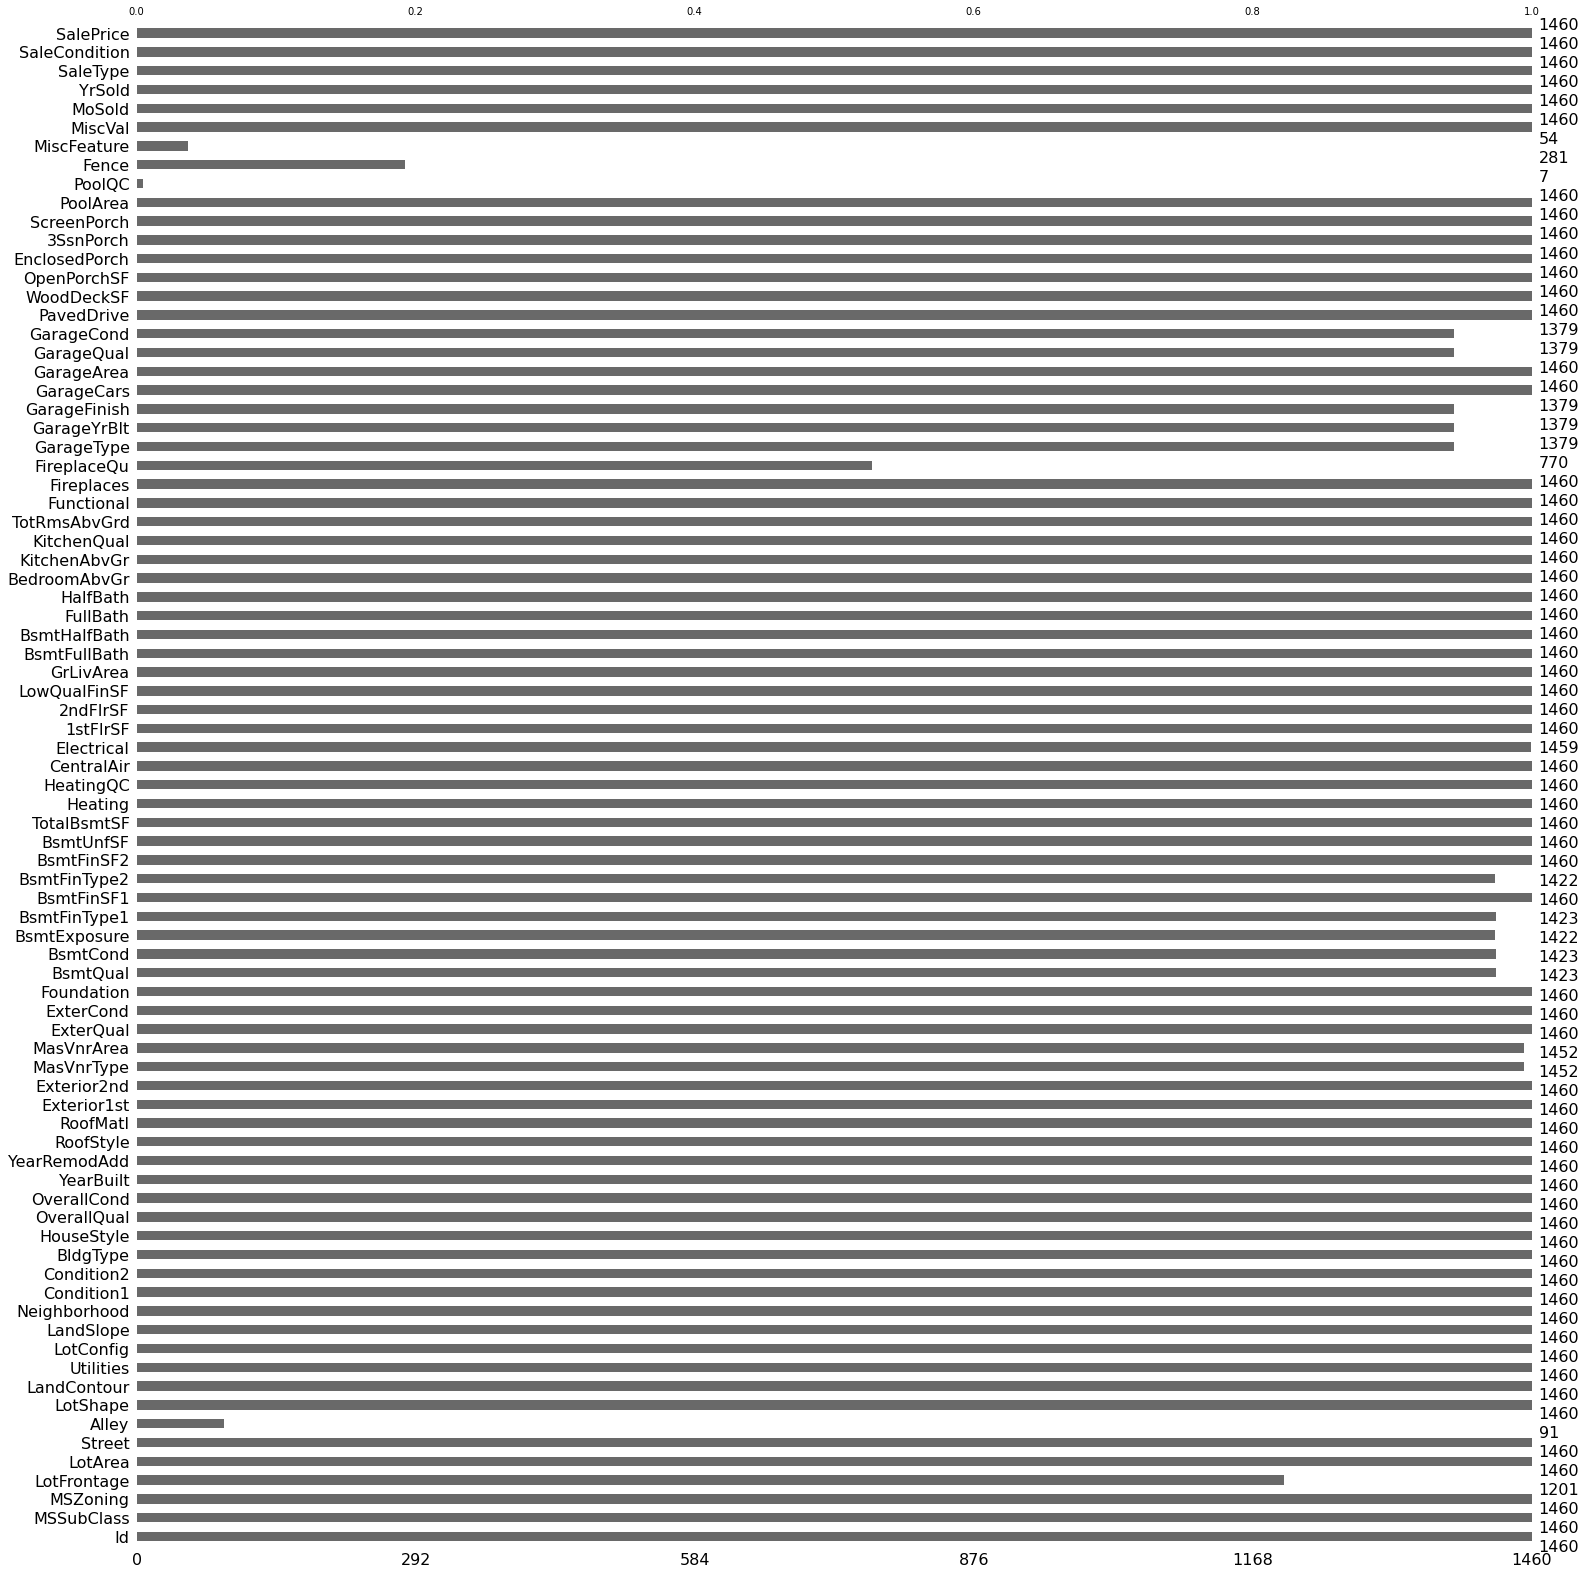

In [44]:
import missingno

missingno.bar(housing_df)

In [53]:
housing_df = housing_df.drop(['Fence','PoolQC','MiscFeature','Alley'],axis=1)

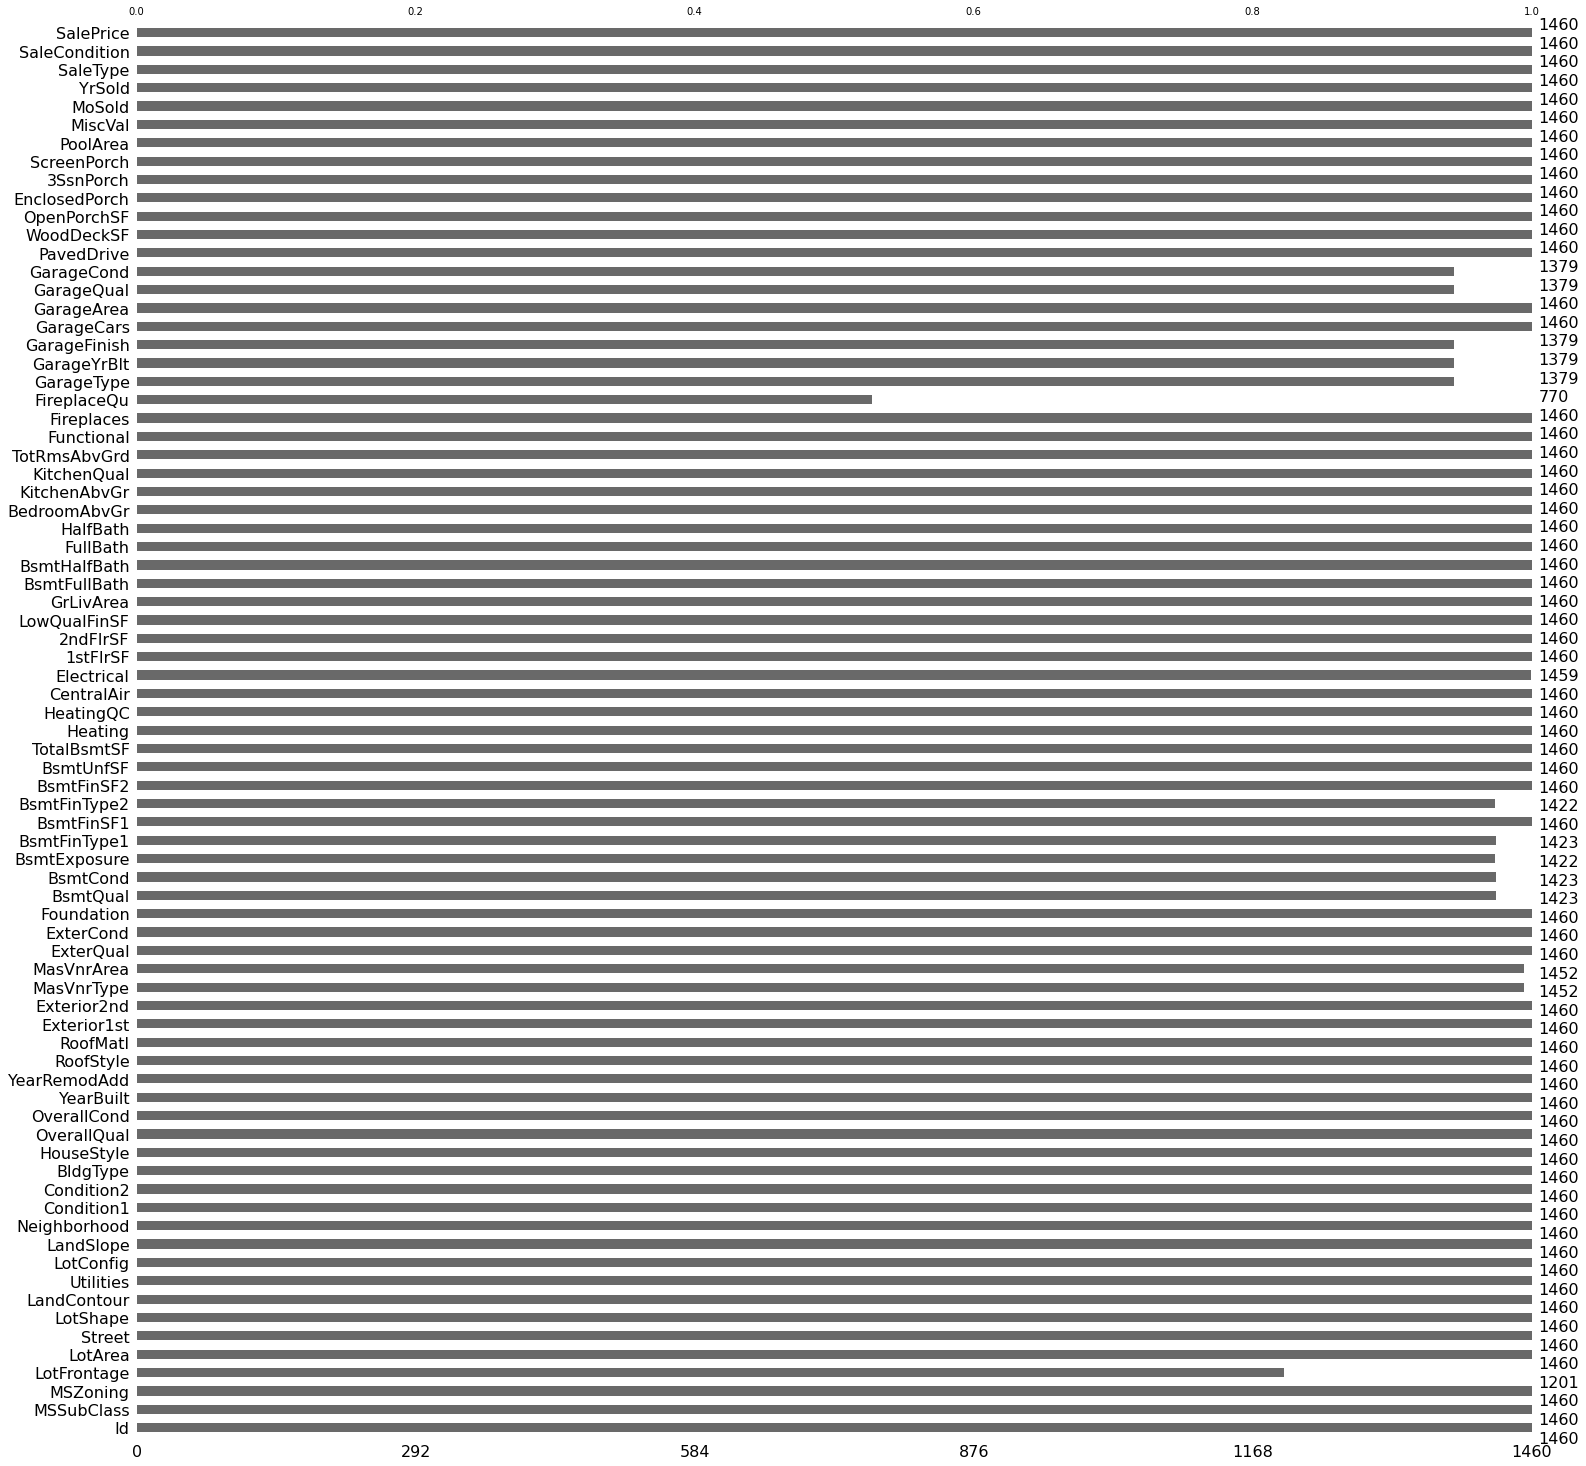

In [54]:
missingno.bar(housing_df)

In [ ]:
    """
    Impute numeric data using MICE imputation with Gradient Boosting Regressor.
    """
    iter_imp_numeric = IterativeImputer(GradientBoostingRegressor())
    imputed_train = iter_imp_numeric.fit_transform(train_numeric)
    train_numeric_imp = pd.DataFrame(imputed_train, columns = train_numeric.columns, index= train_numeric.index)


In [55]:
numeric_cols = housing_df.select_dtypes(['float','int']).columns
categoric_cols = housing_df.select_dtypes('object').columns



In [ ]:
housing_numeric = housing_df[numeric_cols[:-1]]
housing_categoric = housing_df[categoric_cols]

In [64]:



print(housing_numeric)

print(housing_categoric)


        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0          2003          2003       1

In [58]:
    iter_imp_numeric = IterativeImputer(GradientBoostingRegressor())
    imputed_train = iter_imp_numeric.fit_transform(housing_numeric)
    train_numeric_imp = pd.DataFrame(imputed_train, columns = housing_numeric.columns, index= housing_numeric.index)


In [60]:
imputed_train

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 2.000e+00,
        2.008e+03],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 5.000e+00,
        2.007e+03],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 9.000e+00,
        2.008e+03],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 2.500e+03, 5.000e+00,
        2.010e+03],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 4.000e+00,
        2.010e+03],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 6.000e+00,
        2.008e+03]])

# **Auto Impute**

In [63]:
!pip install autoimpute


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 4.5 MB/s 


In [65]:
from autoimpute.imputations import MiceImputer


In [68]:
imp = MiceImputer()
housing_numeric_transformed = imp.fit_transform(housing_numeric)

In [75]:
imp = MiceImputer()
housing_numeric_transformed = imp.fit_transform(housing_categoric)

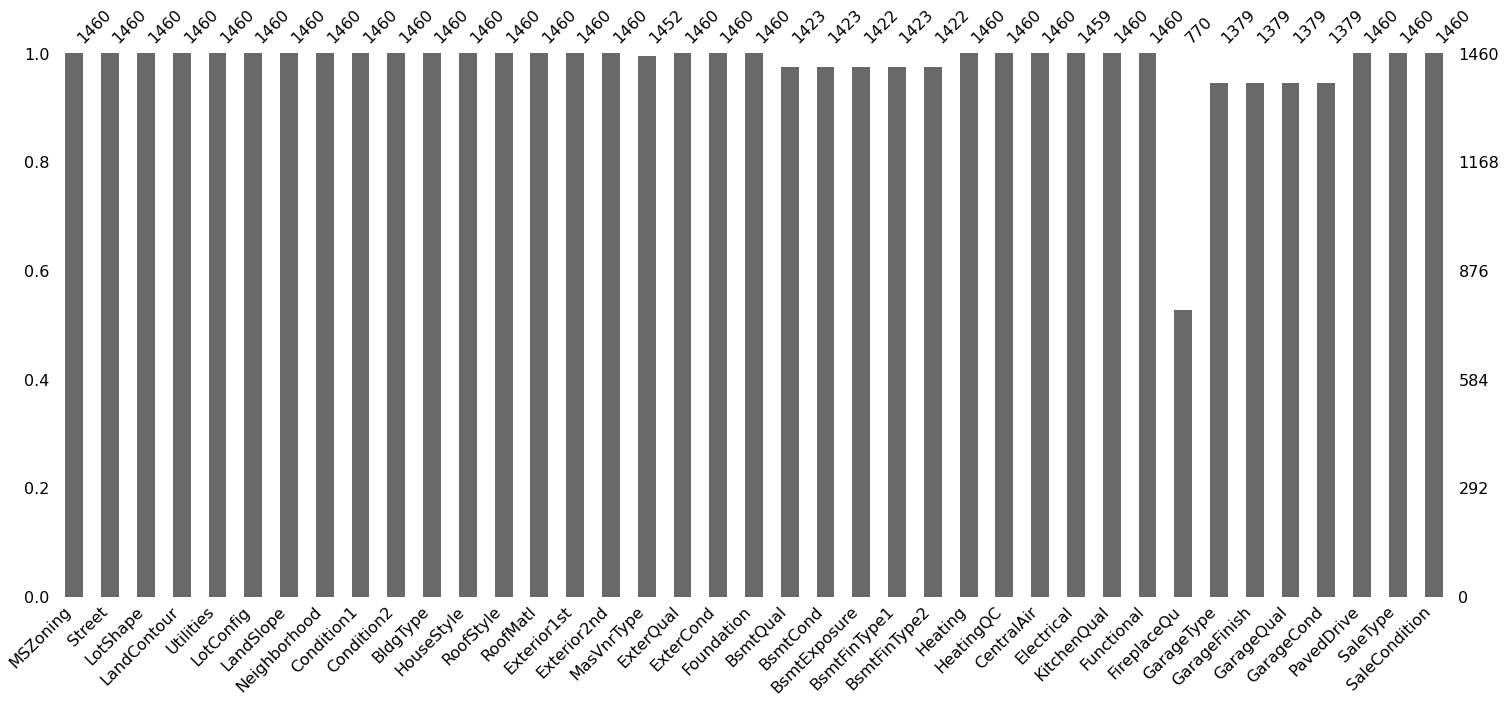

In [77]:
missingno.bar(housing_categoric)

In [79]:
from autoimpute.imputations import SingleImputer
print("Imputing missing data in one line of code with the default SingleImputer")
data_imputed_once = SingleImputer().fit_transform(housing_numeric)
print("Imputation Successful!")

Imputing missing data in one line of code with the default SingleImputer


AttributeError: ignored

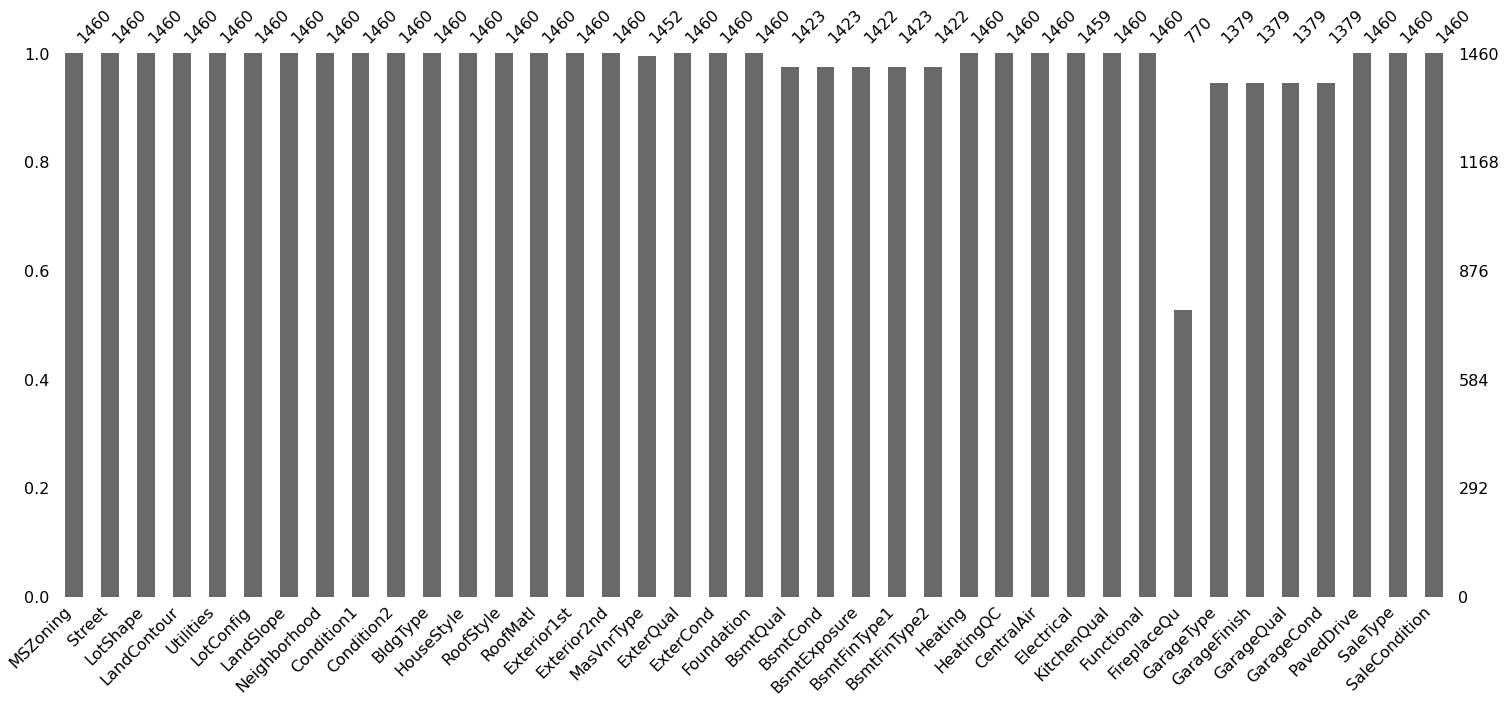

In [74]:


missingno.bar(housing_categoric)